In [ ]:
import pandas as pd; import seaborn as sns; import matplotlib.pyplot as plt; import geopandas as gpd

In [79]:
#importing SNAP Data System
filepath1 = "SNAP Dataset (Original).xls"
dfstate =pd.read_excel(filepath1, sheet_name = 'State') #selecting the State data from a specific sheet in the Excel Workbook

#Geography Data from Pandas
filepath2 = "GeoMap Data.zip"
geo_df = gpd.read_file(filepath2)

# **Research Questions** <br>

I have three variables, total population per state (and county), SNAP Participant Count per state (and county), Funding per state (and County). Each variable has data for years 2000-2010. this analysis uses linear regression to predict funding needs, changes in SNAP participant count, and top states in need of SNAP benefits.

**Questions for Exploratory Data Analysis and Reseach:**
1. How has time effected SNAP Enrollment Poverty Population and Total Population?
2. Which states need the most assistance due to highest levels of poverty and snap enrollment?
3. How is funding split between States? What about poverty?

**Cleaning State Data** <br>
Tidy Data ~ Shape (51, 38) (50 States + Dist of Columbia)

In [80]:
keepvar2 = ['STATE_CD', 'POP00', 'POP01', 'POP02','POP03', 'POP04', 'POP05', 'POP06', 'POP07', 'POP08', 'POP09', 'POP10', 'PRGNUM00', 'PRGNUM01', 'PRGNUM02',  'PRGNUM03',  'PRGNUM04', 'PRGNUM05',  
            'PRGNUM06',  'PRGNUM07',  'PRGNUM08', 'PRGNUM09','PRGNUM10', 'PRGBEN00', 'PRGBEN01', 'PRGBEN02', 'PRGBEN03', 'PRGBEN04','PRGBEN05', 'PRGBEN06', 'PRGBEN07', 'PRGBEN08', 'PRGBEN09',
            'PRGBEN10', 'NUMPOV00', 'NUMPOV06', 'NUMPOV07', 'NUMPOV10']
rename2 = ['State', 'Total Population in 2000','Total Population in 2001', 'Total Population in 2002', 'Total Population in 2003', 'Total Population in 2004', 'Total Population in 2005', 
           'Total Population in 2006', 'Total Population in 2007', 'Total Population in 2008', 'Total Population in 2009', 'Total Population in 2010', 'SNAP Participants in 2000', 
           'SNAP Participants in 2001', 'SNAP Participants in 2002', 'SNAP Participants in 2003', 'SNAP Participants in 2004', 'SNAP Participants in 2005', 'SNAP Participants in 2006', 
           'SNAP Participants in 2007', 'SNAP Participants in 2008', 'SNAP Participants in 2009', 'SNAP Participants in 2010', 'Annual Funding in 2000', 'Annual Funding in 2001','Annual Funding in 2002',
           'Annual Funding in 2003','Annual Funding in 2004','Annual Funding in 2005', 'Annual Funding in 2006','Annual Funding in 2007','Annual Funding in 2008','Annual Funding in 2009',
           'Annual Funding in 2010', 'Population in Poverty in 2000', 'Population in Poverty in 2006', 'Population in Poverty in 2007', 'Population in Poverty in 2010']

In [81]:
dfstatecopy = dfstate[keepvar2].copy() #making state copy of df state with specified columns
dfstatecopy.columns = rename2 #renaming the df state copy with specified names
dfstatecopy.drop(0, inplace = True) #dropping summary statistics
dfstatecopy.drop(index = range (52, 63), inplace = True) #dropping summary statistics

In [82]:
dfstatecopy.to_csv("SNAP Cleaned (State Info) Produced by Code.csv", index = False)

# **Processing Data**<br>

**Creating 3 dataframes (Funding, SNAP Population, and Total Population)**<br>
This will allow analysis of particular states over time as the end result is three datasets with year as index and state as features(variables)

In [83]:
#selected only the Total population columns
total_pop = dfstatecopy[['State','Total Population in 2000', 'Total Population in 2001', 'Total Population in 2002', 'Total Population in 2003', 'Total Population in 2004', 'Total Population in 2005', 
                         'Total Population in 2006', 'Total Population in 2007', 'Total Population in 2008', 'Total Population in 2009', 'Total Population in 2010']]

#selected only the snap population columns
snap_pop = dfstatecopy[['State', 'SNAP Participants in 2000', 'SNAP Participants in 2001', 'SNAP Participants in 2002', 'SNAP Participants in 2003', 'SNAP Participants in 2004', 'SNAP Participants in 2005', 
                        'SNAP Participants in 2006', 'SNAP Participants in 2007', 'SNAP Participants in 2008', 'SNAP Participants in 2009', 'SNAP Participants in 2010']]

#selected only the Funding population columns
funding_usd = dfstatecopy[['State','Annual Funding in 2000', 'Annual Funding in 2001', 'Annual Funding in 2002', 'Annual Funding in 2003', 'Annual Funding in 2004', 'Annual Funding in 2005', 
                           'Annual Funding in 2006', 'Annual Funding in 2007', 'Annual Funding in 2008', 'Annual Funding in 2009', 'Annual Funding in 2010']]

pov_pop = dfstatecopy[['State', 'Population in Poverty in 2000', 'Population in Poverty in 2006', 'Population in Poverty in 2007', 'Population in Poverty in 2010']]
pov_pop.head()

,State,Population in Poverty in 2000,Population in Poverty in 2006,Population in Poverty in 2007,Population in Poverty in 2010
1,AL,637119.0,743556.0,750197.0,883078.0
2,AK,52442.0,71120.0,65266.0,76850.0
3,AZ,646762.0,860355.0,876120.0,1105075.0
4,AR,394960.0,471161.0,483510.0,529710.0
5,CA,4304909.0,4686706.0,4445392.0,5785036.0


In [84]:
#creating numeric years list and setting it to index
yearlist = []
for i in range (0,11):
    yearlist.append(i + 2000)

In [85]:
#Transpose the features (time data) with the state names so that the index is time (...remember indexes can be reset later to become a variable again)
total_pop_t = total_pop.copy()
snap_pop_t = snap_pop.copy()
funding_usd_t = funding_usd.copy()
pov_pop_t = pov_pop.copy()

#FIRST; Making State the index
total_pop_t = total_pop_t.set_index('State')
snap_pop_t = snap_pop_t.set_index('State')
funding_usd_t = funding_usd_t.set_index('State')
pov_pop_t = pov_pop_t.set_index('State')

#SECOND; Transpose the data so that State Names are columns
total_pop_t = total_pop_t.T
snap_pop_t = snap_pop_t.T
funding_usd_t = funding_usd_t.T
pov_pop_t = pov_pop_t.T
pov_pop_t.head()

State,AL,AK,AZ,AR,CA,CO,CT,DE,DC,FL,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Population in Poverty in 2000,637119.0,52442.0,646762.0,394960.0,4304909.0,384830.0,243428.0,67374.0,91435.0,1877399.0,...,84282.0,709555.0,3041115.0,198434.0,53236.0,620938.0,567575.0,273986.0,430657.0,50357.0
Population in Poverty in 2006,743556.0,71120.0,860355.0,471161.0,4686706.0,539332.0,281079.0,88749.0,99671.0,2232534.0,...,102589.0,947105.0,3862741.0,269611.0,61694.0,713181.0,736907.0,310842.0,589377.0,51728.0
Population in Poverty in 2007,750197.0,65266.0,876120.0,483510.0,4445392.0,548520.0,269045.0,86653.0,95441.0,2167111.0,...,101420.0,945263.0,3787071.0,254385.0,60609.0,739135.0,722589.0,302169.0,589168.0,48149.0
Population in Poverty in 2010,883078.0,76850.0,1105075.0,529710.0,5785036.0,651744.0,348881.0,104456.0,107279.0,3048621.0,...,114798.0,1102643.0,4411273.0,362689.0,74720.0,865746.0,890251.0,327459.0,731564.0,62636.0


In [86]:
#THIRD; Add Years to the Columns Again
index_dfs = [total_pop_t, snap_pop_t, funding_usd_t] #cannot use year list on poverty population because the only recorded years are 2000, 2006,2007, 2010
for df in index_dfs:
    df['Year'] = yearlist

pov_years = [2000, 2006, 2007, 2010]
pov_pop_t['Year'] = pov_years

In [87]:
# TOTAL POPULATION
carolinasA = pd.DataFrame() #Creates new dataframe (empty)
carolinasA['Total Population']= total_pop_t[['NC','SC']].sum(axis=1)
carolinasA.reset_index(drop=True, inplace=True) #Drops indexing gained from getting columns from the transposed data (leftover from transposing the data originally)

# SNAP POPULATION
carolinasB = pd.DataFrame() #Creates new dataframe (empty)
carolinasB['Total SNAP Population']= snap_pop_t[['NC','SC']].sum(axis=1) #Summing the population of people enrolled in snap from North Carolina and South Carolina.
carolinasB.reset_index(drop=True, inplace=True) #Drops indexing gained from getting columns from the transposed data (leftover from transposing the data originally)

# FUNDING
carolinasC = pd.DataFrame() #Creates new dataframe (empty)
carolinasC['Total Funding']= funding_usd_t[['NC','SC']].sum(axis=1) #Creates a unique sum of North Carolina and South Carolina's funding.
carolinasC.reset_index(drop=True, inplace=True) #Drops indexing gained from getting columns from the transposed data (leftover from transposing the data originally)

# POVERTY POPULATION
carolinasD = pd.DataFrame()
carolinasD['Year'] = pov_pop_t['Year']
carolinasD['Poverty Population'] = pov_pop_t[['NC','SC']].sum(axis=1)
carolinasD.reset_index(drop=True, inplace=True) #Drops indexing gained from getting columns from the transposed data (leftover from transposing the data originally)

All_Carolinas = pd.concat([carolinasB, carolinasC], axis=1) #Combining all years worth of NC and SC's funding, total population, and SNAP population.
index_id = [0,6,7,10] #years where poverty statistics are available.
Final_Carolinas = All_Carolinas.loc[index_id] #creating a final version of the carolina's dataset that will contain the years 2000,2006,2007,2010
Final_Carolinas.reset_index(drop=True, inplace=True) #Drops indexing gained from getting columns from the transposed data (leftover from transposing the data originally)
Final_Carolinas = pd.concat([Final_Carolinas, carolinasD], axis=1) #ALL TABLES JOINED (but total population because the total is too high and results in less clarity for other variables)
Final_Carolinas.head()

,Total SNAP Population,Total Funding,Year,Poverty Population
0,787441.0,630420.000,2000,1439335.0
1,1415535.0,1527527.000,2006,1914029.0
2,1428239.0,1590455.153,2007,1902928.0
3,2143605.0,3328425.750,2010,2432536.0


**Creating year specific datasets to compare 2010, 2006, and 2000 data**
These years were choosen due to data collection changes in later years. The years 2000 and 2006 are best for comparision due their similar data collection methods.
Additional variables are added: 'Poverty % of Total Population' is the percent of total population in poverty, and '% of Poverty using SNAP' which uses population data to calculate how many citizens in poverty are seen in SNAP enrollment.

In [88]:
# Dataframe for 2010
df_year2010 = dfstatecopy[['State', 'Total Population in 2010','Annual Funding in 2010', 'SNAP Participants in 2010','Population in Poverty in 2010']].copy()             
df_year2010.rename(columns={'Total Population in 2010': 'Total Population', 'Annual Funding in 2010': 'Funding', 'SNAP Participants in 2010':'SNAP Population', 
                            'Population in Poverty in 2010':'Poverty Population'}, inplace = True)

# Dataframe for 2006 
df_year2006 = dfstatecopy[['State', 'Total Population in 2006','Annual Funding in 2006', 'SNAP Participants in 2006','Population in Poverty in 2006']].copy()             
df_year2006.rename(columns={'Total Population in 2006': 'Total Population', 'Annual Funding in 2006': 'Funding', 'SNAP Participants in 2006':'SNAP Population', 
                            'Population in Poverty in 2006':'Poverty Population'}, inplace = True)
df_year2006['Year']= (2006)

# Dataframe for 2000 
df_year2000 = dfstatecopy[['State', 'Total Population in 2000','Annual Funding in 2000', 'SNAP Participants in 2000','Population in Poverty in 2000']].copy()             
df_year2000.rename(columns={'Total Population in 2000': 'Total Population', 'Annual Funding in 2000': 'Funding', 'SNAP Participants in 2000':'SNAP Population', 
                            'Population in Poverty in 2000':'Poverty Population'}, inplace = True)
df_year2000['Year']= (2000)

specific_df_list = [df_year2010, df_year2006, df_year2000]
for df in specific_df_list:
    df[['Total Population', 'Poverty Population']] /= 1000000 #divides the variables into millions
    df['Funding'] /= 100000 #divides by 100,000 because funding was already listed in thousands
    df['Poverty Rate'] = ((df['Poverty Population']/df['Total Population'])*100) #Adding a ratio of poverty to population
    df['% of Poverty using SNAP'] = ((df['SNAP Population']/(df['Poverty Population']*1000000))*100) #Adding a column which indludes the percent of poverty using snap benefits
    df.rename(columns={'Total Population' : 'Total Population in Millions', 'Funding' :'Funding in Millions', 'Poverty Population':'Population in Poverty in Millions'}, inplace=True)

In [89]:
#Merge for layered historgram
specific_dataset = pd.concat([df_year2000,df_year2006], ignore_index=True)
specific_dataset.rename(columns={'Total Population': 'Total Population in Millions', 'Poverty Population':'Poverty Population in Millions', 'Funding': 'Funding in Millions'}, inplace=True)
specific_dataset.head(5)

,State,Total Population in Millions,Funding in Millions,SNAP Population,Population in Poverty in Millions,Year,Poverty Rate,% of Poverty using SNAP
0,AL,4.447100,3.48007,405325.0,0.637119,2000,14.326617,63.618414
1,AK,0.626932,0.45801,29473.0,0.052442,2000,8.364863,56.201136
2,AZ,5.130632,2.45890,277436.0,0.646762,2000,12.605893,42.896150
3,AR,2.673400,2.08633,251901.0,0.394960,2000,14.773696,63.778864
4,CA,33.871648,16.11956,1690077.0,4.304909,2000,12.709476,39.259297


# Results of Data Processing:
- *total_pop_t, snap_pop_t, funding_usd_t, pov_pop_t* are individual datasets for each variable seen in the original state dataset.
- *All_Carolinas* has funding, SNAP population, and poverty information for years 2000,2006,2007,2010 for analysing change over time. These years were choosen becuase they were the only year to have all varibale information (poverty population was only recorded in 2000,2006,2007,2010).
- *Specific Dataset* containing data from the years 2000 and 2006 to allow comparision of 5-year changes in poverty rates, funding, snap population, total population, etc.<br>

# **Data Analysis & Visualization**
In this section I am looking at distributions of vulnerable populations and funding across the Uninted States. Throught this reaseach I have found that California, Texas, New York, and Florida are otliers and the top 4 states in total populaiton, snap funding, and SNAP enrollement. This developement deserved further research and sparked the idea of adding a column of total popualtion to poverty ratio to see which states have the highest rates of poverty and then compare population in poverty to the population using SNAP. Additinally, I added a columns to show the percetn of people in poverty utilizing SNAP benfits. This way I can analyze need of other states that may have lower populations but high poverty for their total population in addition to the outliers.

**Part One**: Changes in Distribution of Poverty, Fudning, and SNAP usage from 2000 to 2006

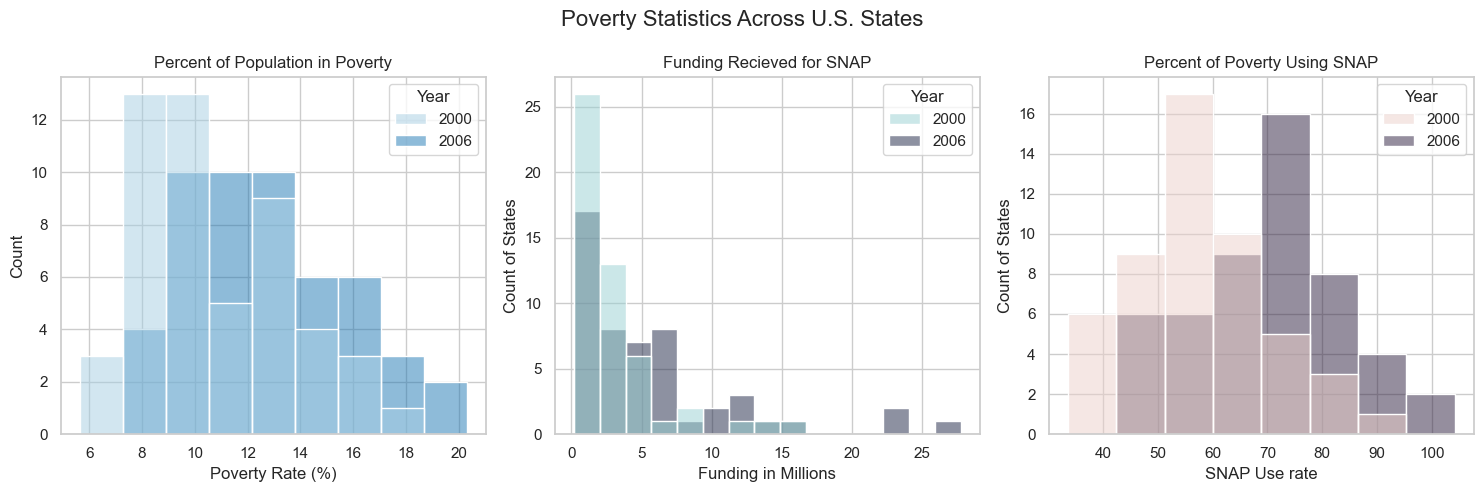

In [90]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.set_theme(style="whitegrid")

#Graphing the Distribution of Poverty with Box Plots
sns.histplot(specific_dataset, x = 'Poverty Rate', hue='Year', palette='Paired', ax=axs[0])
axs[0].set(title='Percent of Population in Poverty', xlabel='Poverty Rate (%)')

#Graphing the distribution of funding across states
sns.histplot(data=specific_dataset, x='Funding in Millions', hue='Year', palette='ch:rot=-.25,hue=1,light=.75', ax=axs[1])
axs[1].set(title='Funding Recieved for SNAP', ylabel='Count of States', xlabel='Funding in Millions')

#Graphing the percentage of Poverty in SNAP enrollement
sns.histplot(data=specific_dataset, x='% of Poverty using SNAP', hue='Year', ax=axs[2])
axs[2].set(title='Percent of Poverty Using SNAP', ylabel='Count of States', xlabel='SNAP Use rate')

fig.suptitle('Poverty Statistics Across U.S. States', fontsize=16)
plt.tight_layout()
plt.show()

**Part Two**: Top 10 Highest Poverty States (By Poverty Rate and Population) in 2010 (MOST RECENT DATA)

In [91]:
top10_printout = df_year2010.copy()
top10_printout[['Total Population in Millions', 'Population in Poverty in Millions', 'Funding in Millions']]*=1000000 #get rid of the 'in millions' scaling
top10_printout.rename(columns={'Total Population in Millions':'Total Population', 'Population in Poverty in Millions': 'Population in Poverty', 'Funding in Millions': 'Funding Received'}, inplace=True)
top10_printout.sort_values(by=['Poverty Rate', 'Population in Poverty'], ascending=False, inplace = True)  #sorting by multiple values to find the top states (accountig for all varibales listed).
top10_printout = top10_printout.head(10) # Keeping only the top 10 from the sorted dataframe

top10_printout = top10_printout.reset_index(drop=True) #rest the index to get rid of old one
top10_printout.index = top10_printout.index +1 #python starts at 0 so to make a rank of 1-10 we need to add 1
top10_printout.rename_axis("Rank", inplace=True) #rename index 'Rank'
top10_printout = top10_printout.style.format({'Total Population': '{:,.0f}', 'Funding Received': '${:,.0f}', 'SNAP Population': '{:,.0f}', 'Population in Poverty': '{:,.0f}','Poverty Rate': '{:.2f}%', '% of Poverty using SNAP': '{:.2f}%'}) #Adding a format to the ranked list
top10_printout

,State,Total Population,Funding Received,SNAP Population,Population in Poverty,Poverty Rate,% of Poverty using SNAP
Rank,,,,,,,
1,MS,"2,970,036","$8,465,429","575,674","644,156",21.69%,89.37%
2,NM,"2,065,932","$5,418,064","356,822","400,779",19.40%,89.03%
3,AL,"4,785,298","$12,260,187","805,095","883,078",18.45%,91.17%
4,KY,"4,346,266","$11,862,912","778,114","796,208",18.32%,97.73%
5,LA,"4,544,228","$12,861,986","825,918","831,512",18.30%,99.33%
6,AR,"2,921,606","$6,864,006","466,598","529,710",18.13%,88.09%
7,DC,"604,453","$1,958,933","118,493","107,279",17.75%,110.45%
8,WV,"1,853,973","$4,869,395","341,156","327,459",17.66%,104.18%
9,SC,"4,636,312","$12,562,984","797,110","813,939",17.56%,97.93%


**Part Three**: Heatmap of SNAP Enrollment

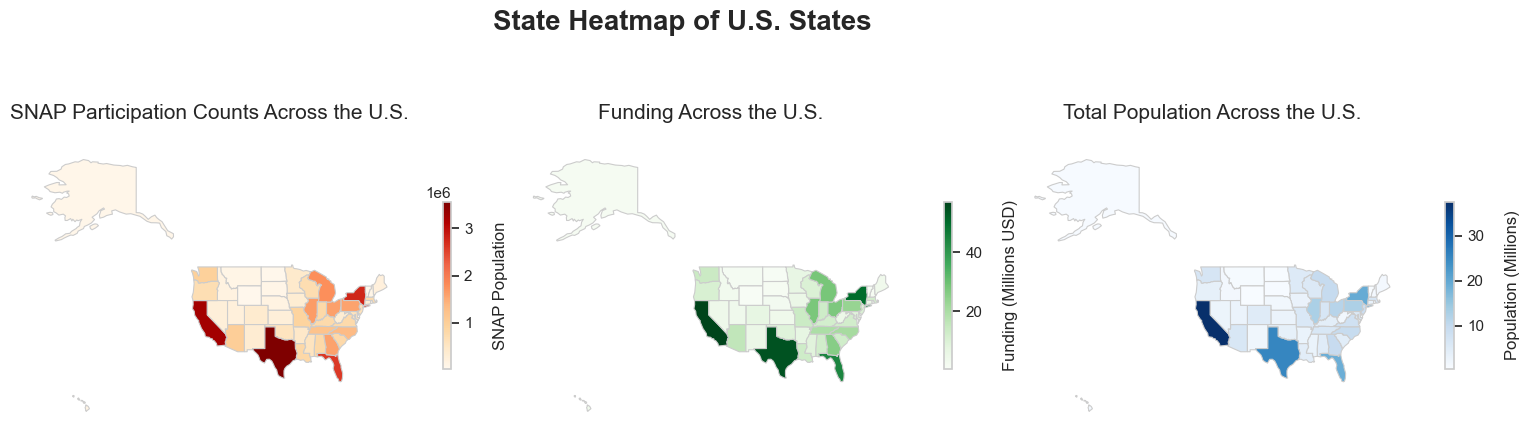

In [120]:
# DF
geo_df.rename(columns={'postal':'State'}, inplace=True)
merged_geo = geo_df.merge(df_year2010, on="State", how='inner') #using df_year10 to created a merge with the geodata dataframe.

# Axis
fig, axs = plt.subplots(1, 3, figsize=(18,4))
sns.set_theme(style="whitegrid")

# SNAP Participation
snap = merged_geo.plot(column='SNAP Population', cmap='OrRd', linewidth=0.8, edgecolor='0.8', ax=axs[0], legend=True, legend_kwds={'label': "SNAP Population", 'shrink': 0.6})
axs[0].set_title('SNAP Participation Counts Across the U.S.', fontsize=15, pad=20)
axs[0].set_axis_off()
snap.get_figure().axes[-1].yaxis.labelpad = 15  # Increase spacing between colorbar and label

# Funding
fund = merged_geo.plot(column='Funding in Millions', cmap='Greens', linewidth=0.8, edgecolor='0.8', ax=axs[1], legend=True, legend_kwds={'label': "Funding (Millions USD)", 'shrink': 0.6})
axs[1].set_title('Funding Across the U.S.', fontsize=15, pad=20)
axs[1].set_axis_off()
fund.get_figure().axes[-1].yaxis.labelpad = 15

# Population
pop = merged_geo.plot(column='Total Population in Millions', cmap='Blues', linewidth=0.8, edgecolor='0.8', ax=axs[2], legend=True, legend_kwds={'label': "Population (Millions)", 'shrink': 0.6})
axs[2].set_title('Total Population Across the U.S.', fontsize=15, pad=20)
axs[2].set_axis_off()
pop.get_figure().axes[-1].yaxis.labelpad = 15

# Add spacing between suptitle and plots
fig.suptitle('State Heatmap of U.S. States', fontsize=20, fontweight='bold', y=1.08)
plt.subplots_adjust(top=0.2)
plt.tight_layout()
plt.show()

**Part Four**: Plotting Funding, Population, Poverty, and SNAP Enrollment Over Time

In [94]:
line_plot_df = pd.melt(Final_Carolinas, id_vars= ['Year'], var_name ='Line Type', value_name='Value')
#I have reordered the funding, populations, and data so that the snap population, funding, and poverty information can become 'hues' in the seaborn map. 

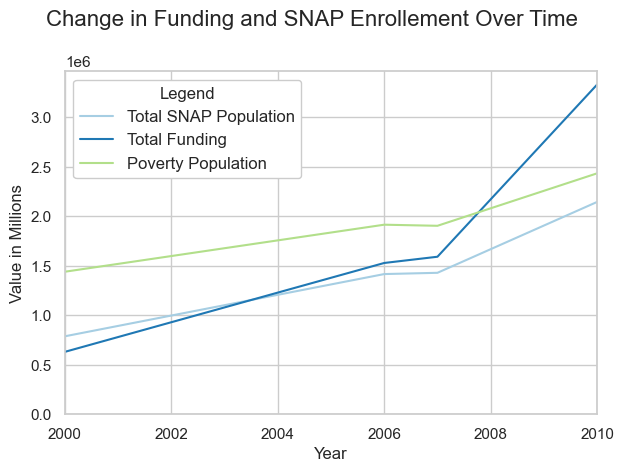

In [121]:
# Plot the Total Population vs SNAP Population over time.
sns.set_style("whitegrid") #white background
sns.lineplot(data=line_plot_df, x="Year", y='Value', hue='Line Type', palette="Paired").set(ylabel='Value in Millions', xlabel='Year')
plt.legend(title='Legend', fontsize=12, framealpha=1) #framealpha makes the legend transparent/solid to the set number. 
plt.suptitle('Change in Funding and SNAP Enrollement Over Time', fontsize=16)
plt.xlim(left=2000, right=2010)
plt.ylim(bottom=0) 
plt.tight_layout() #stops overlapping titles and labels.
plt.show()

# **Analysis Results**
**Questions for Exploratory Data Analysis and Reseach:**<br>

**1. How have changes over time affected SNAP enrollment, total funing, poverty rates, and total population?**<br>
The gap between the population in poverty and those enrolled in the Supplemental Nutrition Assistance Program (SNAP) has been steadily closing, reflecting improvements in program management. Since the 2007 Great Recession, SNAP funding has significantly increased, which can be attributed to rising poverty rates, a stronger national emphasis on supporting those in financial crises, and inflationary pressures. Further analysis should include inflation-adjusted figures and draw data from multiple sources to ensure a comprehensive evaluation of trends over time.

**2. Which states require the most assistance due to high poverty levels and SNAP enrollment?**<br>
While the gap between poverty rates and SNAP enrollment narrowed between 2000 and 2010, some states continue to exhibit disproportionately high poverty rates compared to others. Mississippi, New Mexico, and Alabama are the three states with the highest need, based on both poverty rates and the total amount of their population in poverty. In these states, approximately 90% of households living in poverty are enrolled in SNAP, with poverty rates ranging between 19% and 22%.

Although heatmap data from 2010 shows that California, New York, and Texas receive the highest levels of SNAP funding and have the largest SNAP enrollments, these figures correspond with their overall population sizes. Despite their prominence on heatmaps, these states do not have the highest poverty rates compared to smaller, high-need states like Mississippi and New Mexico.

**3.How is poverty distributed across states, and how has SNAP funding evolved?**<br>
Histogram analysis indicates that poverty rates increased from 2000 to 2006, with several states reaching surpassing the highest poverty levels of 2000, over 18 percent. This growth in poverty became more normalized across states, reflecting the impact of national economic events, such as the Great Recession, which caused a significant rise in poverty across the U.S.

SNAP funding has also evolved over time. In 2000, the majority of states received 5 million USD or less in funding, but by 2006, most states were receiving up to 7 million USD, with a select few states receiving over $20 million. This shift suggests that SNAP administrators adopted a more targeted funding strategy, allocating larger amounts of assistance to the states most affected by poverty, rather than distributing smaller sums evenly across all states.